In [5]:
# pythonnet is imported as "clr"
# this package allows you to import dotNet DLL's and run them within your python environment
import clr
import os
import sys

# Get the installation directory from the environment variable or fall back to the Windows
# default installation path
PIAF_SDK = os.getenv('PIHOME', 'C:\\Program Files\\PIPC')
PIAF_SDK += '\\AF\\PublicAssemblies\\4.0\\'

# check if the AF SDK default directories exist
if not os.path.isdir(PIAF_SDK):
    raise ImportError('PIAF SDK not found in {}, check installation'.format(PIAF_SDK))
    
# append them to the PATH environment variable
sys.path.append(PIAF_SDK)

# add the AF SDK DLL 
clr.AddReference('OSIsoft.AFSDK')

# import the AF SDK
from OSIsoft import AF

print(AF)

<module 'OSIsoft.AF'>


<IPython.core.display.Javascript object>


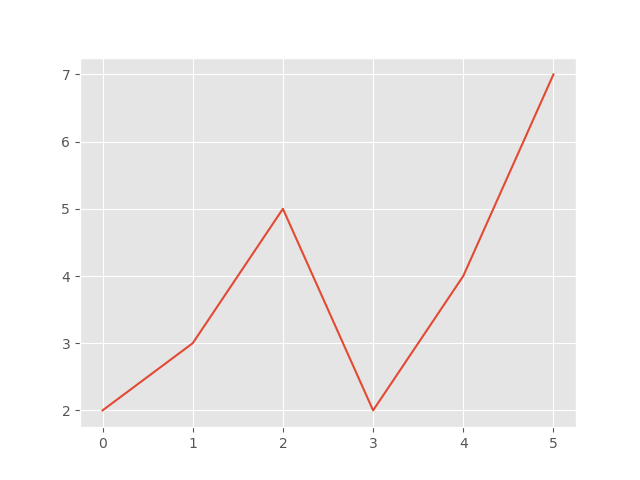

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot([0,1,2,3,4,5], [2,3,5,2,4,7])
plt.show()

Found SINUSOID on data archive DSF-PIDA1
[5.542165, 0.7723272, 3.778157, 24.18557, 85.7641, 98.44351, 98.14255, 81.86028, 13.63163, 0.975068, 3.373119, 23.62705, 85.45801, 99.18903, 96.30454, 76.0009, 14.23581, 4.715471, <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E07808>]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False]
[(0, 'apple'), (1, 'banana'), (2, 'taco'), (3, 'brocolli')]
(0, 'apple')
0
apple


<IPython.core.display.Javascript object>


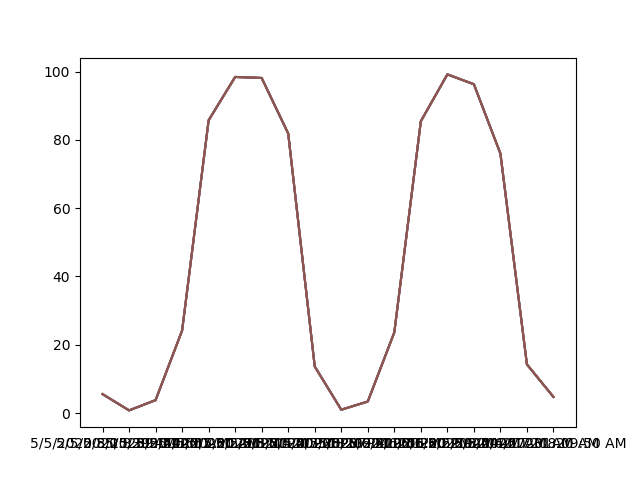

In [16]:
# get first item in GetPIServers object
piserver = AF.PI.PIServers.GetPIServers()[0]

# search for pi point on the pi data archive
pipoint = AF.PI.PIPoint.FindPIPoint(piserver, "sinusoid")

print("Found {} on data archive {}".format(pipoint.Name, piserver.Name))

plot_values = pipoint.PlotValues(
    AF.Time.AFTimeRange('*-1d','*'), 200)
print([val.Value for val in plot_values])
print([val.IsGood for val in plot_values])

good_plot_values = []
for val in plot_values:
    if val.IsGood:
        good_plot_values.append(val.Value)
        
foods = ['apple', 'banana', 'taco', 'brocolli']
print(list(enumerate(foods)))
print(list(enumerate(foods))[0])
print(list(enumerate(foods))[0][0])
print(list(enumerate(foods))[0][1])

x_axis = []
good_plot_values = []
for i, val in enumerate(plot_values):
    if val.IsGood:
        x_axis.append(i)
        good_plot_values.append(val.Value)
        
plt.plot(x_axis, good_plot_values)
plt.show()

['5/5/2020 8:15:39 AM', '5/5/2020 8:39:50 AM', '5/5/2020 9:44:50 AM', '5/5/2020 10:57:50 AM', '5/5/2020 1:31:20 PM', '5/5/2020 2:31:20 PM', '5/5/2020 3:31:20 PM', '5/5/2020 4:40:50 PM', '5/5/2020 7:33:20 PM', '5/5/2020 8:37:20 PM', '5/5/2020 9:42:20 PM', '5/5/2020 10:56:20 PM', '5/6/2020 1:30:20 AM', '5/6/2020 2:39:20 AM', '5/6/2020 3:44:20 AM', '5/6/2020 4:57:20 AM', '5/6/2020 7:31:20 AM', '5/6/2020 8:09:50 AM']


<IPython.core.display.Javascript object>


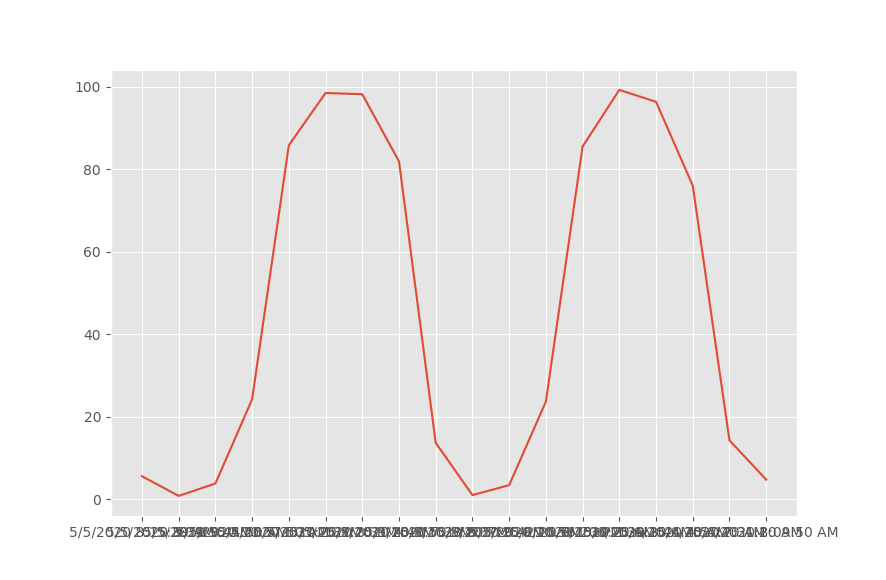

In [32]:
from datetime import datetime
test_date = datetime.strptime('5/5/2020 8:15:39 AM', '%m/%d/%Y %I:%M:%S %p')
x_axis = []
good_plot_values = []
for val in plot_values:
    if val.IsGood:
        x_axis.append(val.Timestamp.ToString())
        good_plot_values.append(val.Value)

print(x_axis)
plt.plot(x_axis, good_plot_values)
plt.show()

<IPython.core.display.Javascript object>


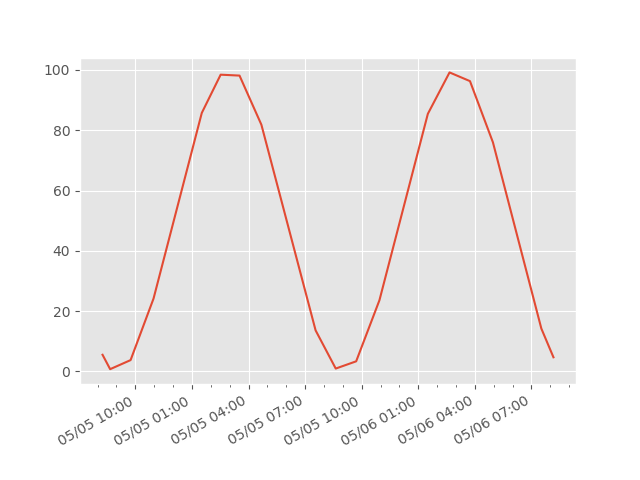

[datetime.datetime(2020, 5, 5, 8, 15, 39), datetime.datetime(2020, 5, 5, 8, 39, 50), datetime.datetime(2020, 5, 5, 9, 44, 50), datetime.datetime(2020, 5, 5, 10, 57, 50), datetime.datetime(2020, 5, 5, 13, 31, 20), datetime.datetime(2020, 5, 5, 14, 31, 20), datetime.datetime(2020, 5, 5, 15, 31, 20), datetime.datetime(2020, 5, 5, 16, 40, 50), datetime.datetime(2020, 5, 5, 19, 33, 20), datetime.datetime(2020, 5, 5, 20, 37, 20), datetime.datetime(2020, 5, 5, 21, 42, 20), datetime.datetime(2020, 5, 5, 22, 56, 20), datetime.datetime(2020, 5, 6, 1, 30, 20), datetime.datetime(2020, 5, 6, 2, 39, 20), datetime.datetime(2020, 5, 6, 3, 44, 20), datetime.datetime(2020, 5, 6, 4, 57, 20), datetime.datetime(2020, 5, 6, 7, 31, 20), datetime.datetime(2020, 5, 6, 8, 9, 50)]


In [81]:
import matplotlib.dates as mdates

dates = list(map(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), x_axis))

hours = mdates.HourLocator(interval=3)   # every 3 hours
hour = mdates.HourLocator(interval=1)  # every hour
hours_fmt = mdates.DateFormatter('%m/%d %I:%M')

fig, ax = plt.subplots()
ax.plot(dates, good_plot_values)

# # format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hour)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%m/%d/%Y %h:%M:%S %p')
ax.grid(True)

# # rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them
fig.autofmt_xdate()
plt.subplots_adjust(bottom=0.2)
plt.show()

print(dates)

In [210]:
def get_good_values(vals):
    timestamps = []
    values = []
    pointname = ''
    for val in vals:
        if val.IsGood and ((type(val.Value) == AF.Asset.AFEnumerationValue) is False):
            pointname = val.PIPoint.Name
            timestamps.append(val.Timestamp.ToString())
            values.append(val.Value)
    return timestamps, values, pointname

In [208]:
# search for pi point on the pi data archive
pipoint2 = AF.PI.PIPoint.FindPIPoint(piserver, "BA:Level.1")

print("Found {} on data archive {}".format(pipoint2.Name, piserver.Name))

plot_values2 = pipoint2.PlotValues(
    AF.Time.AFTimeRange('*-1d','*'), 200)

x_axis2, good_plot_values2, _ = get_good_values(plot_values2)

Found BA:LEVEL.1 on data archive DSF-PIDA1


In [211]:
# search for pi point on the pi data archive
pipoint3 = AF.PI.PIPoint.FindPIPoint(piserver, "CDM158")

print("Found {} on data archive {}".format(pipoint3.Name, piserver.Name))

plot_values3 = pipoint3.PlotValues(
    AF.Time.AFTimeRange('*-1d','*'), 200)

x_axis3, good_plot_values3, _ = get_good_values(plot_values3)
print(good_plot_values3)

Found CDM158 on data archive DSF-PIDA1
[]


<IPython.core.display.Javascript object>


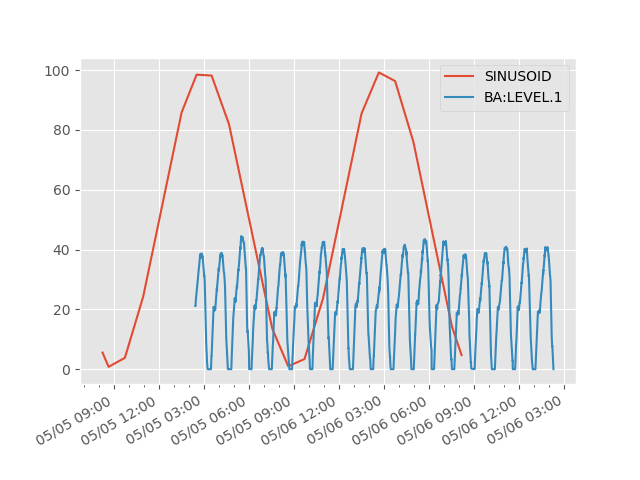

[datetime.datetime(2020, 5, 5, 8, 15, 39), datetime.datetime(2020, 5, 5, 8, 39, 50), datetime.datetime(2020, 5, 5, 9, 44, 50), datetime.datetime(2020, 5, 5, 10, 57, 50), datetime.datetime(2020, 5, 5, 13, 31, 20), datetime.datetime(2020, 5, 5, 14, 31, 20), datetime.datetime(2020, 5, 5, 15, 31, 20), datetime.datetime(2020, 5, 5, 16, 40, 50), datetime.datetime(2020, 5, 5, 19, 33, 20), datetime.datetime(2020, 5, 5, 20, 37, 20), datetime.datetime(2020, 5, 5, 21, 42, 20), datetime.datetime(2020, 5, 5, 22, 56, 20), datetime.datetime(2020, 5, 6, 1, 30, 20), datetime.datetime(2020, 5, 6, 2, 39, 20), datetime.datetime(2020, 5, 6, 3, 44, 20), datetime.datetime(2020, 5, 6, 4, 57, 20), datetime.datetime(2020, 5, 6, 7, 31, 20), datetime.datetime(2020, 5, 6, 8, 9, 50)]


In [113]:
dates = list(map(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), x_axis))
dates2 = list(map(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), x_axis2))
hours = mdates.HourLocator(interval=3)   # every 3 hours
hour = mdates.HourLocator(interval=1)  # every hour
hours_fmt = mdates.DateFormatter('%m/%d %I:%M')

fig, ax = plt.subplots()
ax.plot(dates, good_plot_values, label=pipoint.Name)
ax.plot(dates2, good_plot_values2, label=pipoint2.Name)

# add chart legend
ax.legend()

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hour)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%m/%d/%Y %h:%M:%S %p')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.subplots_adjust(bottom=0.2)
plt.show()

print(dates)

In [147]:
clr.AddReference('System.Collections')
from System import Collections
from pprint import pprint


#Get PI Point List
tagName = "*"
pointSource = "R"
searchQuery = "Tag:{} AND pointsource:{}".format(tagName,pointSource)

pointList = AF.PI.PIPoint.FindPIPoints(piserver,searchQuery,False)
points = AF.PI.PIPointList(Collections.Generic.List[AF.PI.PIPoint](pointList))
print("Number of points found: {}".format(len(list(points))))

points_plot_values =  points.PlotValues(
    AF.Time.AFTimeRange('*-1d','*'), 200, AF.PI.PIPagingConfiguration(0, 10))

# a rather complex print statement to unpack and view our values
[pprint([(v.PIPoint.Name,v.Timestamp.ToString(),v.Value) for v in x]) for x in points_plot_values]


    

Number of points found: 5
[('SINUSOID', '5/5/2020 3:00:01 PM', 98.29963),
 ('SINUSOID', '5/5/2020 3:31:20 PM', 98.14255),
 ('SINUSOID', '5/5/2020 4:40:50 PM', 81.86028),
 ('SINUSOID', '5/5/2020 7:33:20 PM', 13.63163),
 ('SINUSOID', '5/5/2020 8:37:20 PM', 0.975068),
 ('SINUSOID', '5/5/2020 9:42:20 PM', 3.373119),
 ('SINUSOID', '5/5/2020 10:56:20 PM', 23.62705),
 ('SINUSOID', '5/6/2020 1:30:20 AM', 85.45801),
 ('SINUSOID', '5/6/2020 2:39:20 AM', 99.18903),
 ('SINUSOID', '5/6/2020 3:44:20 AM', 96.30454),
 ('SINUSOID', '5/6/2020 4:57:20 AM', 76.0009),
 ('SINUSOID', '5/6/2020 7:31:20 AM', 14.23581),
 ('SINUSOID', '5/6/2020 8:31:20 AM', 1.556455),
 ('SINUSOID', '5/6/2020 9:31:20 AM', 1.857491),
 ('SINUSOID', '5/6/2020 10:40:50 AM', 18.13982),
 ('SINUSOID', '5/6/2020 1:33:20 PM', 86.36847),
 ('SINUSOID', '5/6/2020 2:37:20 PM', 99.02496),
 ('SINUSOID', '5/6/2020 2:57:20 PM', 99.98646),
 ('SINUSOID',
  '5/6/2020 3:00:03 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD24B3D88>)]

[('CDM158',
  '5/5/2020 3:00:01 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD24B3808>),
 ('CDM158',
  '5/5/2020 3:00:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD24B3088>),
 ('CDM158',
  '5/5/2020 3:02:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD24B3E08>),
 ('CDM158',
  '5/5/2020 3:06:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26AB488>),
 ('CDM158',
  '5/5/2020 3:07:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26AB808>),
 ('CDM158',
  '5/5/2020 3:09:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD27F1E88>),
 ('CDM158',
  '5/5/2020 3:13:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26BCE08>),
 ('CDM158',
  '5/5/2020 3:14:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD2390188>),
 ('CDM158',
  '5/5/2020 3:15:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD25FC108>),
 ('CDM158',
  '5/5/2020 3:20

 ('CDM158',
  '5/5/2020 9:15:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289C108>),
 ('CDM158',
  '5/5/2020 9:17:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289C508>),
 ('CDM158',
  '5/5/2020 9:21:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289C988>),
 ('CDM158',
  '5/5/2020 9:22:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289C848>),
 ('CDM158',
  '5/5/2020 9:27:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289CCC8>),
 ('CDM158',
  '5/5/2020 9:28:20 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289CE08>),
 ('CDM158',
  '5/5/2020 9:28:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289CC88>),
 ('CDM158',
  '5/5/2020 9:31:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289C088>),
 ('CDM158',
  '5/5/2020 9:34:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD289CAC8>),
 ('CDM158',
  '5/5/2020 9:35

 ('CDM158',
  '5/6/2020 1:26:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3ED08>),
 ('CDM158',
  '5/6/2020 1:27:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3E9C8>),
 ('CDM158',
  '5/6/2020 1:29:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3EFC8>),
 ('CDM158',
  '5/6/2020 1:32:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3EB08>),
 ('CDM158',
  '5/6/2020 1:33:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3E348>),
 ('CDM158',
  '5/6/2020 1:37:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3EA08>),
 ('CDM158',
  '5/6/2020 1:40:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3ED48>),
 ('CDM158',
  '5/6/2020 1:40:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3EE48>),
 ('CDM158',
  '5/6/2020 1:43:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1F3E8C8>),
 ('CDM158',
  '5/6/2020 1:47

 ('CDM158',
  '5/6/2020 5:15:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0ED9E08>),
 ('CDM158',
  '5/6/2020 5:16:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD299F088>),
 ('CDM158',
  '5/6/2020 5:17:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD299FA08>),
 ('CDM158',
  '5/6/2020 5:23:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD299F188>),
 ('CDM158',
  '5/6/2020 5:24:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD299FC88>),
 ('CDM158',
  '5/6/2020 5:27:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD299F6C8>),
 ('CDM158',
  '5/6/2020 5:30:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD2921548>),
 ('CDM158',
  '5/6/2020 5:31:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD2921088>),
 ('CDM158',
  '5/6/2020 5:35:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD2921408>),
 ('CDM158',
  '5/6/2020 5:37

  '5/6/2020 9:28:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0DAC8>),
 ('CDM158',
  '5/6/2020 9:28:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0D8C8>),
 ('CDM158',
  '5/6/2020 9:29:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0D188>),
 ('CDM158',
  '5/6/2020 9:33:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0D148>),
 ('CDM158',
  '5/6/2020 9:35:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0D808>),
 ('CDM158',
  '5/6/2020 9:36:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0DA08>),
 ('CDM158',
  '5/6/2020 9:36:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0D2C8>),
 ('CDM158',
  '5/6/2020 9:42:50 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0D248>),
 ('CDM158',
  '5/6/2020 9:43:20 AM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD0E0DE48>),
 ('CDM158',
  '5/6/2020 9:45:20 AM',
  <

  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD1E0D708>),
 ('CDM158',
  '5/6/2020 1:35:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26B23C8>),
 ('CDM158',
  '5/6/2020 1:38:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26B2208>),
 ('CDM158',
  '5/6/2020 1:39:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26B2D48>),
 ('CDM158',
  '5/6/2020 1:40:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26B2F48>),
 ('CDM158',
  '5/6/2020 1:44:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26FF448>),
 ('CDM158',
  '5/6/2020 1:47:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26FFC48>),
 ('CDM158',
  '5/6/2020 1:48:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26FF588>),
 ('CDM158',
  '5/6/2020 1:49:50 PM',
  <OSIsoft.AF.Asset.AFEnumerationValue object at 0x0000015AD26FF748>),
 ('CDM158',
  '5/6/2020 1:54:50 PM',
  <OSIsoft.AF.Asset.AFEnumer

[None, None, None, None, None]

In [219]:
points_plot_values =  points.PlotValues(
    AF.Time.AFTimeRange('*-1d','*'), 200, AF.PI.PIPagingConfiguration(0, 10))

def get_good_values_list(vals_list):
    output = []
    for vals in vals_list:
        x, y, p = get_good_values(vals)
        x = list(map(lambda w: datetime.strptime(w, '%m/%d/%Y %I:%M:%S %p'), x))
        if len(x) > 0:
            output.append((p, x, y))
    return output

good_values_list = get_good_values_list(points_plot_values)

pprint([x for x in good_values_list])

[('SINUSOID',
  [datetime.datetime(2020, 5, 5, 15, 33, 10),
   datetime.datetime(2020, 5, 5, 16, 40, 50),
   datetime.datetime(2020, 5, 5, 19, 33, 20),
   datetime.datetime(2020, 5, 5, 20, 37, 20),
   datetime.datetime(2020, 5, 5, 21, 42, 20),
   datetime.datetime(2020, 5, 5, 22, 56, 20),
   datetime.datetime(2020, 5, 6, 1, 30, 20),
   datetime.datetime(2020, 5, 6, 2, 39, 20),
   datetime.datetime(2020, 5, 6, 3, 44, 20),
   datetime.datetime(2020, 5, 6, 4, 57, 20),
   datetime.datetime(2020, 5, 6, 7, 31, 20),
   datetime.datetime(2020, 5, 6, 8, 31, 20),
   datetime.datetime(2020, 5, 6, 9, 31, 20),
   datetime.datetime(2020, 5, 6, 10, 40, 50),
   datetime.datetime(2020, 5, 6, 13, 33, 20),
   datetime.datetime(2020, 5, 6, 14, 37, 20),
   datetime.datetime(2020, 5, 6, 15, 27, 20)],
  [97.7095,
   81.86028,
   13.63163,
   0.975068,
   3.373119,
   23.62705,
   85.45801,
   99.18903,
   96.30454,
   76.0009,
   14.23581,
   1.556455,
   1.857491,
   18.13982,
   86.36847,
   99.02496,
   9

In [222]:
good_values_list[0][2]

[97.7095,
 81.86028,
 13.63163,
 0.975068,
 3.373119,
 23.62705,
 85.45801,
 99.18903,
 96.30454,
 76.0009,
 14.23581,
 1.556455,
 1.857491,
 18.13982,
 86.36847,
 99.02496,
 98.58442]

<IPython.core.display.Javascript object>


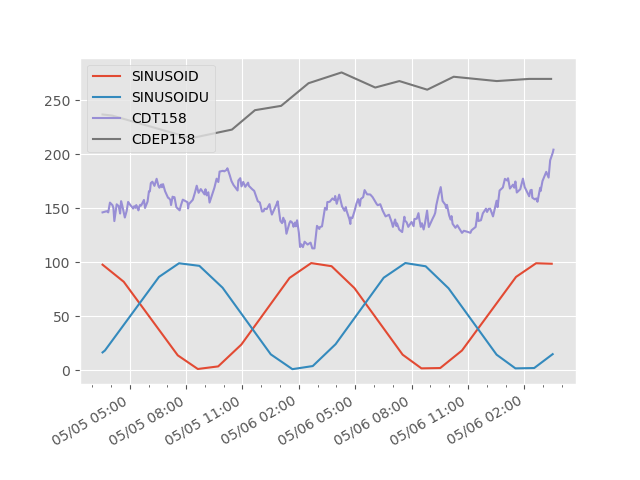

[datetime.datetime(2020, 5, 5, 8, 15, 39), datetime.datetime(2020, 5, 5, 8, 39, 50), datetime.datetime(2020, 5, 5, 9, 44, 50), datetime.datetime(2020, 5, 5, 10, 57, 50), datetime.datetime(2020, 5, 5, 13, 31, 20), datetime.datetime(2020, 5, 5, 14, 31, 20), datetime.datetime(2020, 5, 5, 15, 31, 20), datetime.datetime(2020, 5, 5, 16, 40, 50), datetime.datetime(2020, 5, 5, 19, 33, 20), datetime.datetime(2020, 5, 5, 20, 37, 20), datetime.datetime(2020, 5, 5, 21, 42, 20), datetime.datetime(2020, 5, 5, 22, 56, 20), datetime.datetime(2020, 5, 6, 1, 30, 20), datetime.datetime(2020, 5, 6, 2, 39, 20), datetime.datetime(2020, 5, 6, 3, 44, 20), datetime.datetime(2020, 5, 6, 4, 57, 20), datetime.datetime(2020, 5, 6, 7, 31, 20), datetime.datetime(2020, 5, 6, 8, 9, 50)]


In [223]:
hours = mdates.HourLocator(interval=3)   # every 3 hours
hour = mdates.HourLocator(interval=1)  # every hour
hours_fmt = mdates.DateFormatter('%m/%d %I:%M')

fig, ax = plt.subplots()
for point_values in good_values_list:
    ax.plot(point_values[1], point_values[2], label=point_values[0])

# add chart legend
ax.legend()

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hour)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%m/%d/%Y %h:%M:%S %p')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.subplots_adjust(bottom=0.2)
plt.show()

print(dates)